<a href="https://colab.research.google.com/github/audreyemmely/pln/blob/main/pln_lista2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Resolução Lista 2**

---

Audrey Emmely Rodrigues Vasconcelos

Karen Nayara Gomes da Silva

In [1]:
import pandas as pd
import re
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [3]:
#from google.colab import files
#uploaded = files.upload()

In [4]:
df = pd.read_csv('train_data.txt', sep =':::', header = None, engine = 'python', nrows = 10000)
df.columns = ['id', 'title', 'genre', 'description']

###### Questão 1
Determine a distribuição de comprimentos dos textos (em quantidade de caracteres), listando estas quantidades e plotando um histograma. 

In [5]:
print(df.description.apply(len))

0        546
1        184
2        650
3       1082
4        625
        ... 
9995     254
9996     874
9997     451
9998     786
9999     372
Name: description, Length: 10000, dtype: int64


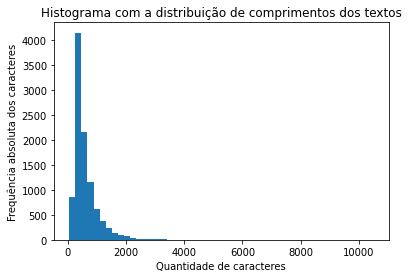

In [6]:
df['description'].str.len().plot.hist(bins=50)
plt.title("Histograma com a distribuição de comprimentos dos textos")
plt.xlabel("Quantidade de caracteres")
plt.ylabel("Frequência absoluta dos caracteres")
plt.show()

###### Questão 2
Aplique os seguintes passos de pré-processamento aos textos: 
* Remova todas as palavras que contêm números; 
* Converta as palavras para minúsculas; 
* Remova pontuação; 
* Tokenize os textos em palavras, gerando um dicionário único com *n* tokens e convertendo cada texto em um vetor de dimensão *n* com a respectiva contagem de palavras. 

Em seguida, encontre as palavras mais frequentes da base de textos. 


In [7]:
def preprocess(description):
  description = re.sub(r'\w*\d\w*', '', description) #remove todas as palavras que contêm números
  description = re.sub(r'[^a-zA-Z ]', '', description.lower())
  return re.sub(r'\s+', ' ', description) #retira espaços repetidos

In [8]:
df.description = df.description.apply(preprocess)
df.description

0        listening in to a conversation between his do...
1        a brother and sister with a past incestuous r...
2        as the bus empties the students for their fie...
3        to help their unemployed father make ends mee...
4        the films title refers not only to the unreco...
                              ...                        
9995     the show began with jared and kristen in kris...
9996     the center characters of the film are two kid...
9997     ashland is the story of ash slavin a lonely a...
9998     railroad foreman murray sinclair is dismissed...
9999     cruise the radio airwaves to assist the ghr g...
Name: description, Length: 10000, dtype: object

In [9]:
def tokenize_text(raw_text: str):
    tokenized_str = nltk.word_tokenize(raw_text)
    tokens = [i.lower() for i in tokenized_str if i not in string.punctuation]
    return tokens

df['tokenized'] = df.description.apply(tokenize_text)

In [10]:
df

,id,title,genre,description,tokenized
0,1,Oscar et la dame rose (2009),drama,listening in to a conversation between his do...,"[listening, in, to, a, conversation, between, ..."
1,2,Cupid (1997),thriller,a brother and sister with a past incestuous r...,"[a, brother, and, sister, with, a, past, inces..."
2,3,"Young, Wild and Wonderful (1980)",adult,as the bus empties the students for their fie...,"[as, the, bus, empties, the, students, for, th..."
3,4,The Secret Sin (1915),drama,to help their unemployed father make ends mee...,"[to, help, their, unemployed, father, make, en..."
4,5,The Unrecovered (2007),drama,the films title refers not only to the unreco...,"[the, films, title, refers, not, only, to, the..."
...,...,...,...,...,...
9995,9996,"""Friday Night Cranks"" (2007/I)",reality-tv,the show began with jared and kristen in kris...,"[the, show, began, with, jared, and, kristen, ..."
9996,9997,Donkey in the City: 3D Animation Film (????),animation,the center characters of the film are two kid...,"[the, center, characters, of, the, film, are, ..."
9997,9998,Ashland (2007),drama,ashland is the story of ash slavin a lonely a...,"[ashland, is, the, story, of, ash, slavin, a, ..."
9998,9999,Whispering Smith (1926),western,railroad foreman murray sinclair is dismissed...,"[railroad, foreman, murray, sinclair, is, dism..."


In [11]:
def freq_words(x, terms = 50):
  all_words = ' '.join([description for description in x])
  all_words = all_words.split()

  fdist = nltk.FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  d = words_df.nlargest(columns="count", n = terms)
  plt.figure(figsize=(8,12))
  ax = sns.barplot(data=d, x="count", y = "word", color='skyblue')
  ax.set(ylabel='word')
  plt.show()

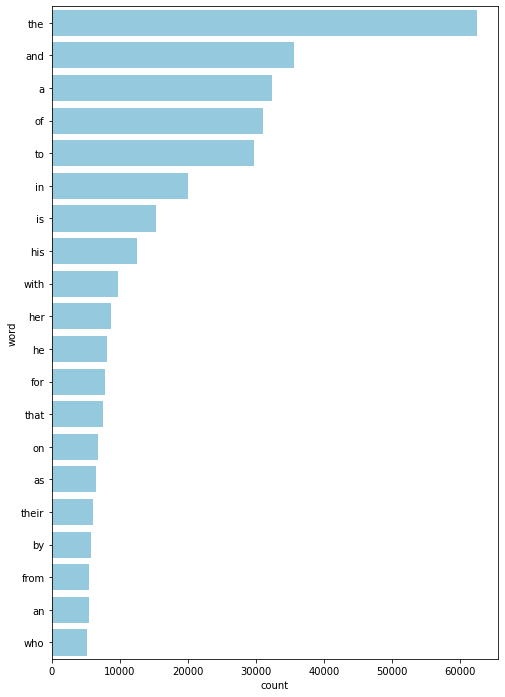

In [12]:
freq_words(df['description'], 20)

###### Questão 3
Aplique os seguintes passos de pré-processamento aos textos processados na questão anterior:

* Remova stopwords;
* Realize rotulação de POS;
* Realize stemização;

Exiba os resultados em alguns textos. Verifique quais são as palavras mais
frequentes e compare com as palavras mais frequentes da questão anterior.

In [13]:
# Remove stopwords
stop_words = set(nltk.corpus.stopwords.words('english'))
def tokenize_text(raw_text: str):
    tokenized_str = nltk.word_tokenize(raw_text)
    tokens = [i.lower() for i in tokenized_str if (i not in string.punctuation) and (i not in stop_words)]
    return tokens

# Rotulação de POS
def pos_text(sentence):
  #print('sentence', sentence)
  words = str(sentence).split(' ')
  #print('words', words)
  return nltk.pos_tag(sentence)

# Stemização
snowball_stemmer = nltk.stem.snowball.SnowballStemmer('english')
def stem_snowball(words):
  return ' '.join([snowball_stemmer.stem(word[0]) for word in words])

In [14]:
df['tokenized2'] = df.description.apply(tokenize_text)

df['tokenized2'] = df.tokenized2.apply(pos_text)

df['tokenized2'] = df.tokenized2.apply(stem_snowball)

In [15]:
df['tokenized2']

0       listen convers doctor parent yearold oscar lea...
1       brother sister past incestu relationship curre...
2       bus empti student field trip museum natur hist...
3       help unemploy father make end meet edith twin ...
4       film titl refer unrecov bodi ground zero also ...
                              ...                        
9995    show began jare kristen kristen eventu left sh...
9996    center charact film two kidsa boy girl donkey ...
9997    ashland stori ash slavin lone depress teen sec...
9998    railroad foreman murray sinclair dismiss georg...
9999    cruis radio airwav assist ghr grindhous radio ...
Name: tokenized2, Length: 10000, dtype: object

**Referências**

[NLTK HOWTO](https://www.nltk.org/howto/portuguese_en.html)
